In [1]:
# 분류기
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

# 전처리
from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV

# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')

# datasets


### 정밀도(Precision), 재현율(Recall)의 Trade_off
- sklearn Binarizer class의 fit_transform()
- 임계값(treshold)보다 크면 1, 작으면 0

In [2]:
x = [[-1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

In [4]:
# BInarizer를 이용해 treshold return
holder = Binarizer(threshold=0.5)
print(holder.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


- predict_proba() : 개별 타겟(label)별 예측확률 값 반환

In [5]:
titanic = pd.read_csv('../data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_label = titanic['Survived']
titanic_data  = titanic.drop(['Survived'], axis = 1)

In [8]:
# 레이이블 인코딩 Cabin , Sex , Embarked
from sklearn.preprocessing import LabelEncoder

def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm

def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm

In [10]:
titanic_data_feature = transform_features(titanic_data)
titanic_data_feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [11]:
# 평가지표 확인하는 함수
def metrics_evaluation(y_test, y_pred) :
    print('정확도 {}, 정밀도 {}, 재현율 {}, 조화평균 {}'
          .format(accuracy_score(y_test, y_pred),
                  precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred),
                  f1_score(y_test, y_pred),))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data_feature, 
                                                    titanic_label,
                                                    test_size = 0.2,
                                                    random_state = 10)

In [14]:
# 분류기 생성
logistic_model = LogisticRegression()

In [15]:
# 학습
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# 예측
y_pred = logistic_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64


In [20]:
# 확률 예측
y_pred_proba = logistic_model.predict_proba(X_test)
y_pred_proba 

array([[0.90642125, 0.09357875],
       [0.85371789, 0.14628211],
       [0.8771801 , 0.1228199 ],
       [0.07331652, 0.92668348],
       [0.10645454, 0.89354546],
       [0.84935248, 0.15064752],
       [0.85619692, 0.14380308],
       [0.85752814, 0.14247186],
       [0.89740442, 0.10259558],
       [0.8618656 , 0.1381344 ],
       [0.74145071, 0.25854929],
       [0.09105653, 0.90894347],
       [0.34345693, 0.65654307],
       [0.4519568 , 0.5480432 ],
       [0.76689595, 0.23310405],
       [0.77273486, 0.22726514],
       [0.97045275, 0.02954725],
       [0.94491019, 0.05508981],
       [0.43073278, 0.56926722],
       [0.81241928, 0.18758072],
       [0.92511496, 0.07488504],
       [0.62309944, 0.37690056],
       [0.31055993, 0.68944007],
       [0.9139328 , 0.0860672 ],
       [0.69505631, 0.30494369],
       [0.85340717, 0.14659283],
       [0.8536207 , 0.1463793 ],
       [0.2974405 , 0.7025595 ],
       [0.87708863, 0.12291137],
       [0.06654355, 0.93345645],
       [0.

In [24]:
# 한눈에 보기 쉽게 예측값과 예측 확률값 병합
# 예측값을 예측 확률값의 shape과 똑같이 맞춰준 뒤 cancatenate
pred_y_result = np.concatenate([y_pred_proba, y_pred.reshape(-1, 1)], axis=1)
pred_y_result

array([[0.90642125, 0.09357875, 0.        ],
       [0.85371789, 0.14628211, 0.        ],
       [0.8771801 , 0.1228199 , 0.        ],
       [0.07331652, 0.92668348, 1.        ],
       [0.10645454, 0.89354546, 1.        ],
       [0.84935248, 0.15064752, 0.        ],
       [0.85619692, 0.14380308, 0.        ],
       [0.85752814, 0.14247186, 0.        ],
       [0.89740442, 0.10259558, 0.        ],
       [0.8618656 , 0.1381344 , 0.        ],
       [0.74145071, 0.25854929, 0.        ],
       [0.09105653, 0.90894347, 1.        ],
       [0.34345693, 0.65654307, 1.        ],
       [0.4519568 , 0.5480432 , 1.        ],
       [0.76689595, 0.23310405, 0.        ],
       [0.77273486, 0.22726514, 0.        ],
       [0.97045275, 0.02954725, 0.        ],
       [0.94491019, 0.05508981, 0.        ],
       [0.43073278, 0.56926722, 1.        ],
       [0.81241928, 0.18758072, 0.        ],
       [0.92511496, 0.07488504, 0.        ],
       [0.62309944, 0.37690056, 0.        ],
       [0.

In [25]:
# 평가지표 확인
metrics_evaluation(y_test, y_pred)

정확도 0.8268156424581006, 정밀도 0.746031746031746, 재현율 0.7580645161290323, 조화평균 0.752


In [36]:
# treshold 설정, default=0.5
user_th = 0.3

# 예측확률값의 posiive영역만 가져와서 실행
y_pred_proba_01 = y_pred_proba[:, 1].reshape(-1, 1)
#y_pred_proba_01

# Binarizer 살행
user_pred = Binarizer(threshold=user_th).fit_transform(y_pred_proba_01)
#user_pred

In [34]:
# 평가지표 확인
# user_th(threshold)가 낮아지면 재현율은 높아지지만 정밀도는 낮아짐
metrics_evaluation(y_test, user_pred)

정확도 0.7932960893854749, 정밀도 0.6582278481012658, 재현율 0.8387096774193549, 조화평균 0.7375886524822695


- TPR(True Positive Rate)
TP / FN + TP
- TNR(True Negative Rate)
TN / TN + FP

In [41]:
# TPR 구하기
pred_positive_label = logistic_model.predict_proba(X_test)[:,1]
pred_positive_label

array([0.09357875, 0.14628211, 0.1228199 , 0.92668348, 0.89354546,
       0.15064752, 0.14380308, 0.14247186, 0.10259558, 0.1381344 ,
       0.25854929, 0.90894347, 0.65654307, 0.5480432 , 0.23310405,
       0.22726514, 0.02954725, 0.05508981, 0.56926722, 0.18758072,
       0.07488504, 0.37690056, 0.68944007, 0.0860672 , 0.30494369,
       0.14659283, 0.1463793 , 0.7025595 , 0.12291137, 0.93345645,
       0.84922727, 0.22726514, 0.72696136, 0.03923478, 0.77827555,
       0.109969  , 0.67782035, 0.28385339, 0.13210196, 0.10260138,
       0.06291584, 0.1418205 , 0.10997951, 0.27034733, 0.27269196,
       0.49934411, 0.14219232, 0.14220859, 0.97705291, 0.25852196,
       0.30818038, 0.11449299, 0.16188406, 0.441201  , 0.29711527,
       0.9671966 , 0.05871423, 0.76414741, 0.94110795, 0.06039253,
       0.15138618, 0.90025931, 0.68110555, 0.56275497, 0.02692116,
       0.15506807, 0.27286735, 0.10737231, 0.09655538, 0.53372924,
       0.32345451, 0.07538391, 0.12573209, 0.04110009, 0.79435

In [42]:
# precision_recall_curve 사용 : precision, recall, threshold return
precision, recall, threshold = precision_recall_curve(y_test, pred_positive_label)
precision, recall, threshold

(array([0.35632184, 0.35260116, 0.35465116, 0.35672515, 0.35882353,
        0.36094675, 0.36309524, 0.36526946, 0.36746988, 0.36969697,
        0.37195122, 0.37423313, 0.37654321, 0.37888199, 0.38125   ,
        0.3836478 , 0.38607595, 0.38853503, 0.39102564, 0.39354839,
        0.3961039 , 0.39869281, 0.40131579, 0.40397351, 0.40666667,
        0.40939597, 0.40540541, 0.40136054, 0.39726027, 0.4       ,
        0.40559441, 0.4084507 , 0.41428571, 0.42335766, 0.42647059,
        0.42962963, 0.43283582, 0.43939394, 0.44274809, 0.43846154,
        0.43410853, 0.4375    , 0.44094488, 0.4516129 , 0.45528455,
        0.45901639, 0.46280992, 0.46666667, 0.47058824, 0.47457627,
        0.47863248, 0.48275862, 0.47826087, 0.48245614, 0.48672566,
        0.49107143, 0.4954955 , 0.5       , 0.50458716, 0.50925926,
        0.51401869, 0.51886792, 0.52380952, 0.52884615, 0.53398058,
        0.53921569, 0.54455446, 0.55      , 0.55555556, 0.56701031,
        0.57291667, 0.57894737, 0.58510638, 0.60

- 시각화(임계한 변화에 따른 정밀도, 재현율 시각화)

ValueError: x and y must have same first dimension, but have shapes (162,) and (163,)

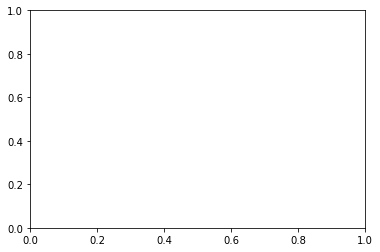

In [43]:
plt.figure()

plt.plot(threshold, precision, linestyle='--', label='precision')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()

plt.show()
polt.close()